In [ ]:
import pandas as pd
import tensorflow as tf
from tensorflow.keras.layers import Dense,LSTM,Embedding,Bidirectional,Dropout
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras import Sequential

Created By: Risky Novendri, Kota Jambi, Jambi

In [ ]:
Dataset = '/content/drive/MyDrive/Dicoding Dataset/emotion.txt'

In [ ]:
data_reader = pd.read_csv(Dataset, sep=';', names = ['Teks','Sentiment'])

In [ ]:
data_reader

,Teks,Sentiment
0,i didnt feel humiliated,sadness
1,i can go from feeling so hopeless to so damned...,sadness
2,im grabbing a minute to post i feel greedy wrong,anger
3,i am ever feeling nostalgic about the fireplac...,love
4,i am feeling grouchy,anger
...,...,...
15995,i just had a very brief time in the beanbag an...,sadness
15996,i am now turning and i feel pathetic that i am...,sadness
15997,i feel strong and good overall,joy
15998,i feel like this was such a rude comment and i...,anger


In [ ]:
data_reader.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16000 entries, 0 to 15999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Teks       16000 non-null  object
 1   Sentiment  16000 non-null  object
dtypes: object(2)
memory usage: 250.1+ KB


In [ ]:
category = pd.get_dummies(data_reader.Sentiment) #One Hot Encoding
df = pd.concat([data_reader,category], axis=1)

In [ ]:
df

,Teks,Sentiment,anger,fear,joy,love,sadness,surprise
0,i didnt feel humiliated,sadness,0,0,0,0,1,0
1,i can go from feeling so hopeless to so damned...,sadness,0,0,0,0,1,0
2,im grabbing a minute to post i feel greedy wrong,anger,1,0,0,0,0,0
3,i am ever feeling nostalgic about the fireplac...,love,0,0,0,1,0,0
4,i am feeling grouchy,anger,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...
15995,i just had a very brief time in the beanbag an...,sadness,0,0,0,0,1,0
15996,i am now turning and i feel pathetic that i am...,sadness,0,0,0,0,1,0
15997,i feel strong and good overall,joy,0,0,1,0,0,0
15998,i feel like this was such a rude comment and i...,anger,1,0,0,0,0,0


In [ ]:
df.drop(columns=['Sentiment'])

,Teks,anger,fear,joy,love,sadness,surprise
0,i didnt feel humiliated,0,0,0,0,1,0
1,i can go from feeling so hopeless to so damned...,0,0,0,0,1,0
2,im grabbing a minute to post i feel greedy wrong,1,0,0,0,0,0
3,i am ever feeling nostalgic about the fireplac...,0,0,0,1,0,0
4,i am feeling grouchy,1,0,0,0,0,0
...,...,...,...,...,...,...,...
15995,i just had a very brief time in the beanbag an...,0,0,0,0,1,0
15996,i am now turning and i feel pathetic that i am...,0,0,0,0,1,0
15997,i feel strong and good overall,0,0,1,0,0,0
15998,i feel like this was such a rude comment and i...,1,0,0,0,0,0


In [ ]:
x = df['Teks'].values #Selection data
y = df[["anger","fear","joy","love","sadness","surprise"]]

In [ ]:
from sklearn.model_selection import train_test_split #Split Dataset

In [ ]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y, test_size=0.2) #Split with data train and testing with 8:2

In [ ]:
tkn = Tokenizer(num_words=5000 , oov_token=True , filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n') #initialize tokenizer

In [ ]:
tkn.fit_on_texts(xtrain) #tokenizing
tkn.fit_on_texts(xtest)

In [ ]:
print(tkn.word_index)

{True: 1, 'i': 2, 'feel': 3, 'and': 4, 'to': 5, 'the': 6, 'a': 7, 'that': 8, 'feeling': 9, 'of': 10, 'my': 11, 'in': 12, 'it': 13, 'like': 14, 'so': 15, 'for': 16, 'im': 17, 'me': 18, 'but': 19, 'was': 20, 'have': 21, 'is': 22, 'this': 23, 'am': 24, 'with': 25, 'not': 26, 'about': 27, 'be': 28, 'as': 29, 'on': 30, 'you': 31, 'just': 32, 'at': 33, 'when': 34, 'or': 35, 'all': 36, 'because': 37, 'more': 38, 'do': 39, 'can': 40, 'really': 41, 'up': 42, 't': 43, 'are': 44, 'by': 45, 'very': 46, 'been': 47, 'know': 48, 'if': 49, 'out': 50, 'myself': 51, 'time': 52, 'how': 53, 'what': 54, 'get': 55, 'little': 56, 'had': 57, 'now': 58, 'will': 59, 'from': 60, 'being': 61, 'they': 62, 'people': 63, 'them': 64, 'would': 65, 'he': 66, 'want': 67, 'her': 68, 'some': 69, 'think': 70, 'one': 71, 'still': 72, 'ive': 73, 'him': 74, 'even': 75, 'who': 76, 'an': 77, 'life': 78, 'its': 79, 'there': 80, 'make': 81, 'we': 82, 'bit': 83, 'something': 84, 'love': 85, 'much': 86, 'going': 87, 'dont': 88, 'th

In [ ]:
seqtrain= tkn.texts_to_sequences(xtrain) #sequences
seqtest = tkn.texts_to_sequences(xtest)

In [ ]:
padtrain = pad_sequences(seqtrain,maxlen=80, padding='post', truncating='post') #Padding Text
padtest = pad_sequences(seqtest, maxlen=80, padding='post', truncating='post')

In [ ]:
print(padtrain)

[[   2    3  259 ...    0    0    0]
 [   2 1480   19 ...    0    0    0]
 [   2    3   31 ...    0    0    0]
 ...
 [   2   14    9 ...    0    0    0]
 [  17    6  856 ...    0    0    0]
 [   2  144    7 ...    0    0    0]]


In [ ]:
model = Sequential([ #Create Model with LSTM
                    Embedding(input_dim=5000 ,output_dim=16,input_length=80),
                    Dropout(0.2),
                    Dense(64,activation='relu'),
                    Bidirectional(LSTM(128,return_sequences=True)),
                    Bidirectional(LSTM(64)),
                    Dropout(0.3),
                    Dense(64,activation='relu'),
                    Dense(6, activation='softmax')
])

In [ ]:
class myCallback(tf.keras.callbacks.Callback): #callback func
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.9 and logs.get('val_accuracy')>0.9):
      print("\nAkurasi Terpenuhi!,Akurasi > 90%")
      self.model.stop_training = True
callbacks = myCallback()

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy']) #Model Compiling

In [ ]:
record = model.fit(padtrain,ytrain, epochs=50, validation_data=(padtest,ytest), verbose= 2,callbacks=callbacks, batch_size=128) #Train Model

Epoch 1/50
100/100 - 80s - loss: 1.5914 - accuracy: 0.3380 - val_loss: 1.5333 - val_accuracy: 0.4419
Epoch 2/50
100/100 - 74s - loss: 1.2243 - accuracy: 0.5473 - val_loss: 0.9469 - val_accuracy: 0.6394
Epoch 3/50
100/100 - 75s - loss: 0.7772 - accuracy: 0.7088 - val_loss: 0.7235 - val_accuracy: 0.7291
Epoch 4/50
100/100 - 74s - loss: 0.5712 - accuracy: 0.7966 - val_loss: 0.5528 - val_accuracy: 0.8091
Epoch 5/50
100/100 - 75s - loss: 0.4185 - accuracy: 0.8550 - val_loss: 0.4547 - val_accuracy: 0.8444
Epoch 6/50
100/100 - 75s - loss: 0.3065 - accuracy: 0.9025 - val_loss: 0.3761 - val_accuracy: 0.8756
Epoch 7/50
100/100 - 74s - loss: 0.2357 - accuracy: 0.9219 - val_loss: 0.3608 - val_accuracy: 0.8900
Epoch 8/50
100/100 - 75s - loss: 0.2088 - accuracy: 0.9299 - val_loss: 0.3503 - val_accuracy: 0.8838
Epoch 9/50
100/100 - 74s - loss: 0.1816 - accuracy: 0.9398 - val_loss: 0.3441 - val_accuracy: 0.8825
Epoch 10/50
100/100 - 74s - loss: 0.1535 - accuracy: 0.9484 - val_loss: 0.3450 - val_accura

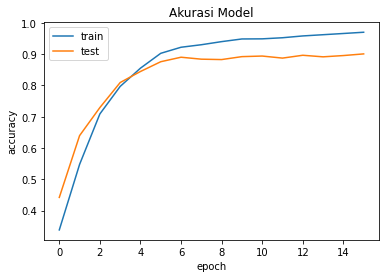

In [ ]:
#Model Result
import matplotlib.pyplot as plt
plt.plot(record.history['accuracy'])
plt.plot(record.history['val_accuracy'])
plt.title('Akurasi Model')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

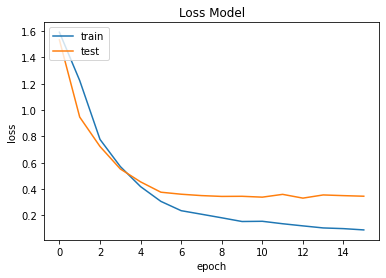

In [ ]:
plt.plot(record.history['loss'])
plt.plot(record.history['val_loss'])
plt.title('Loss Model')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()